In [8]:
import nbsetup
from simulations.ideal_gas.models import IsolatedBox
from helpers.ergodic import ErgodicEnsemble
from helpers.timeseries import ErgodicTimeSeries

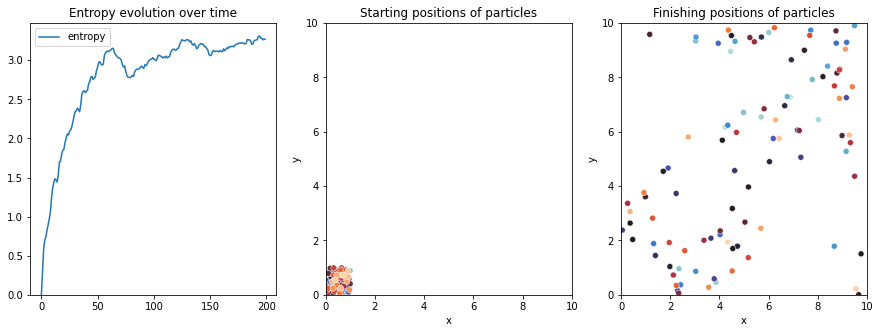

In [7]:
skewed = IsolatedBox(100, skew=0.1)
skewed.simulate(200)
skewed.plot(False)

In [11]:
class IsolatedBoxAnalysis(ErgodicTimeSeries):
    """
    Simple class to handle the ergodic analysis of DaisyWorld
    """
    def __init__(self, ensembles=10, size=10, particles=100, skew=0.1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.boxes = [IsolatedBox(particles, width=size, height=size, skew=skew) for i in range(ensembles)]
        self.bins = range(size+1)
    
    def simulate(self, distance=100):
        """ Runs the simulation for all worlds for `distance` steps """
        timestep_obs = []        
        for d in range(distance):
            self.log("Simulating", d)
            ensemble_obs = []
            for b in self.boxes:
                b.step()
                ensemble_obs.append(w.grid_as_numpy().flatten())
            timestep_obs.append(ensemble_obs)
        
        self.observations += timestep_obs